# 👉🏻 기본 세팅

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import squarify 
import warnings
from matplotlib.gridspec import GridSpec
%matplotlib inline

def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

get_font_family()

font_family = get_font_family()
# 폰트설정
plt.rc('font', family=font_family)
# 마이너스폰트 설정
plt.rc('axes', unicode_minus=False)
# ggplot으로 그래프 스타일 설정
plt.style.use('ggplot')
# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

warnings.filterwarnings(action='ignore')

# 👉🏻 데이터 로딩
* (brandnm에 결측치를 채운 DB)

In [7]:
df = pd.read_excel('./data/closet_share_수정.xlsx', engine='openpyxl')
df

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,None
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,None
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,None
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y
...,...,...,...,...,...,...,...,...
1466,Yves Saint Laurent,logo point clutch bag pink,a119721,2019-04-10,2021-03-01,7days,BA,Y
1467,Prada,saffiano lux M gray,a1146069,2021-02-11,2021-03-01,7days,BA,Y
1468,Burberry,basic pattern sweater beige,a1147848,2021-02-28,2021-03-01,7days,T,Y
1469,Chanel,graphics pattern sweat-shirts white,a1147788,2021-02-28,2021-03-01,7days,T,Y


# 👉🏻 Feature 생성 및 수정

## 1️⃣ 한글명 제품 타입

In [8]:
sub_type = {'O':'아우터', 'T':'상의', 'B':'하의', 'TP':'투피스', 'D':'드레스', 'BA':'가방'}
def sub_type_map(x):
    return sub_type[x]

df['타입']= df['sub_type'].map(sub_type_map)


## 2️⃣ 날짜 feature 수정 및 추가

In [9]:
df['reg_date'] = pd.to_datetime(df['reg_date'])
df['order_date'] = pd.to_datetime(df['order_date'])
df['month'] = df['order_date'].dt.month
df['day'] =  df['order_date'].dt.day

## 3️⃣ app_yn 수정 : nan 데이터 N으로 채우기

In [10]:
df['app_yn'] = df['app_yn'].fillna('N')

## 👉🏻 유저별 대여 현황 (50개의 유저가 2개 이상 주문)

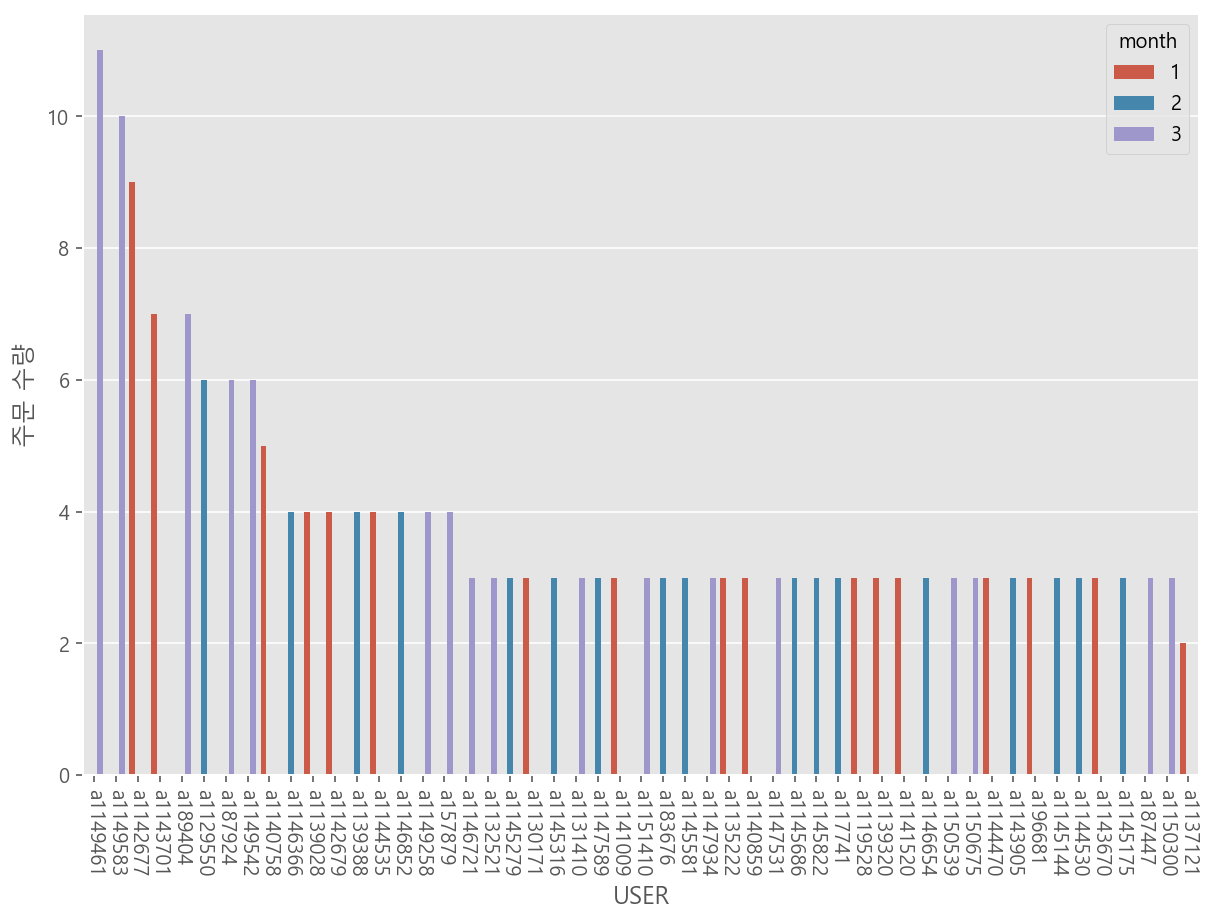

In [177]:
df_cross = pd.crosstab(df['USER'], df['month'])
df_cross['sum']= df_cross.sum(axis=1)
df_cross = df_cross.sort_values('sum', ascending=False)
df_cross['month'] = 0
for i in range(df_cross.shape[0]):
    if df_cross.iloc[i, 0]!=0:
        df_cross.iloc[i,-1]= 1
    elif df_cross.iloc[i, 1]!=0:
        df_cross.iloc[i,-1]= 2
    elif df_cross.iloc[i, 2]!=0:
        df_cross.iloc[i,-1]= 3
plt.figure(figsize=(10,7))
sns.barplot(data=df_cross[:51],x=df_cross.index[:51],  y=df_cross.iloc[:51, :]['sum'],hue='month')
plt.ylabel('주문 수량')
plt.xticks(rotation=270)
plt.show()

## 👉🏻 월별 대여 현황 (일별 count 계산)

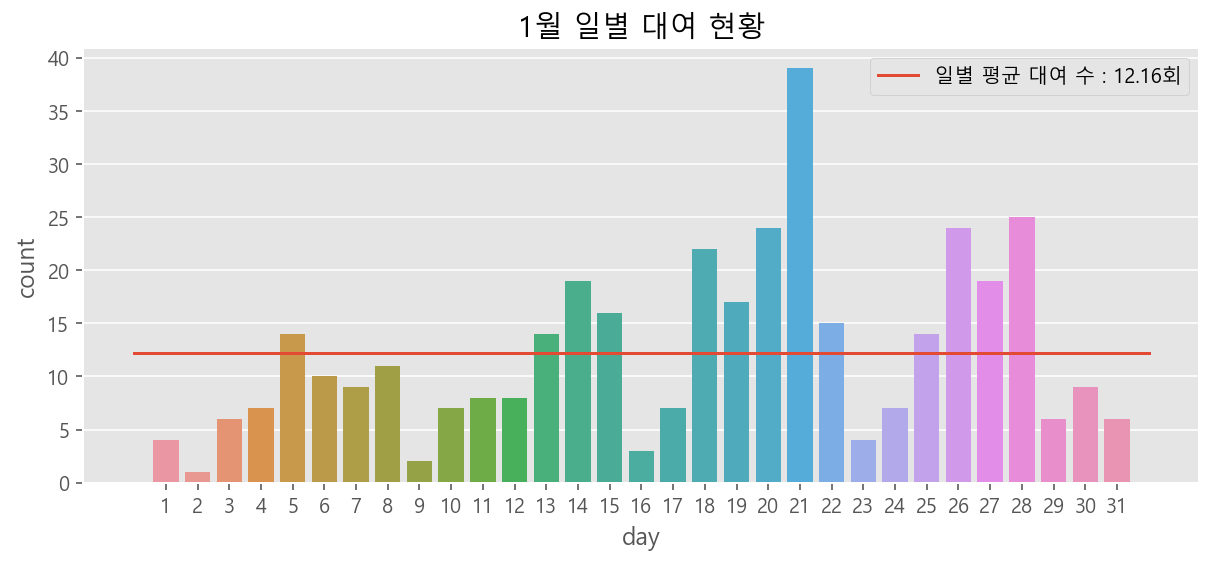

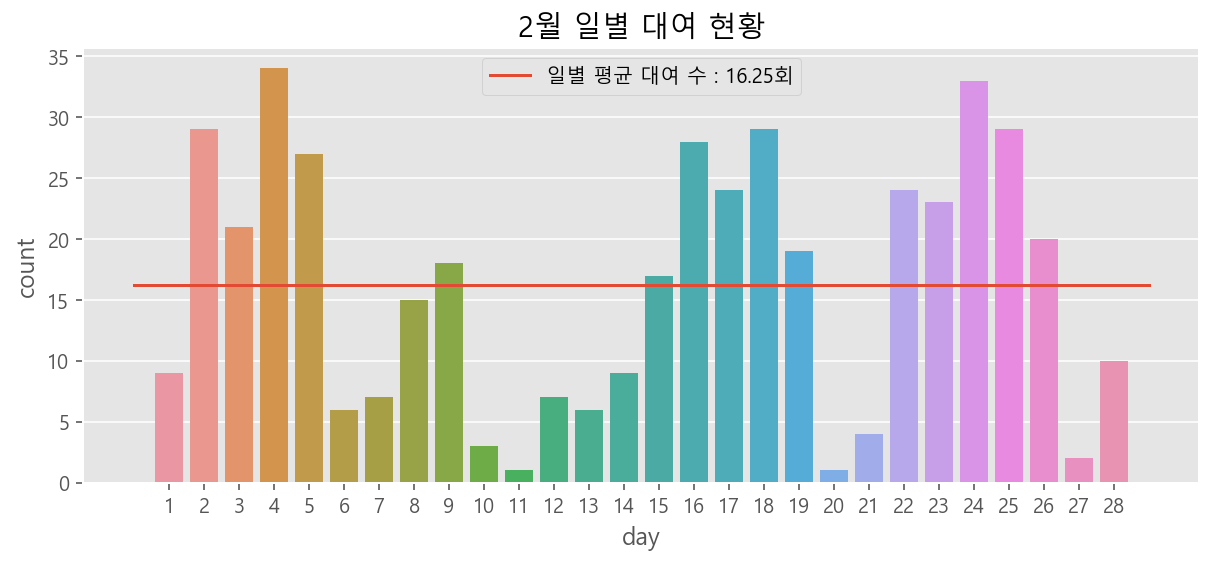

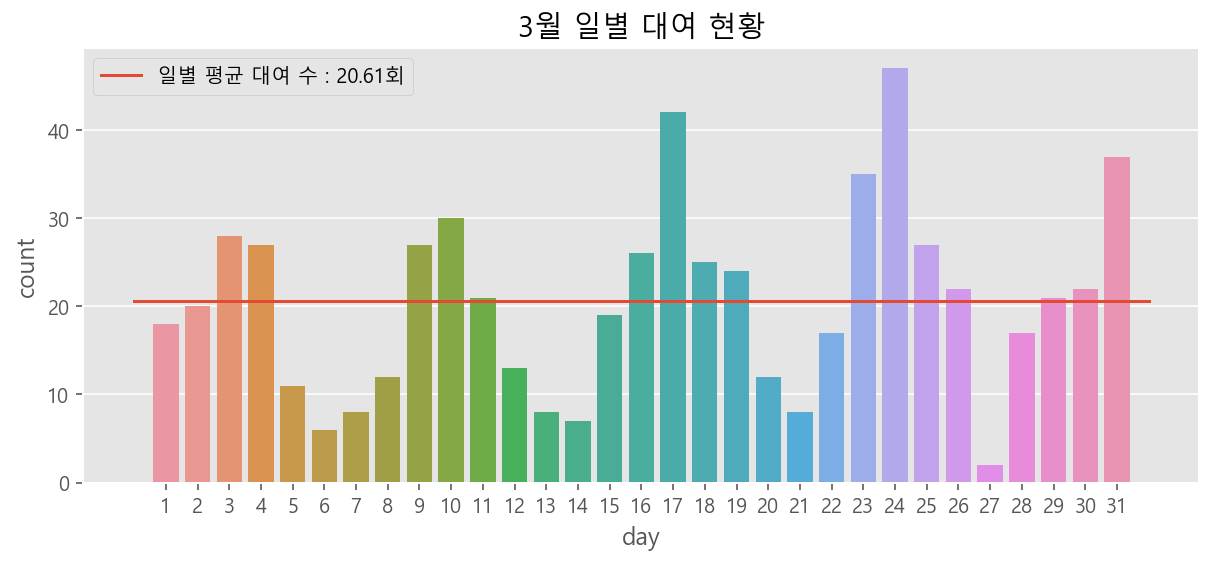

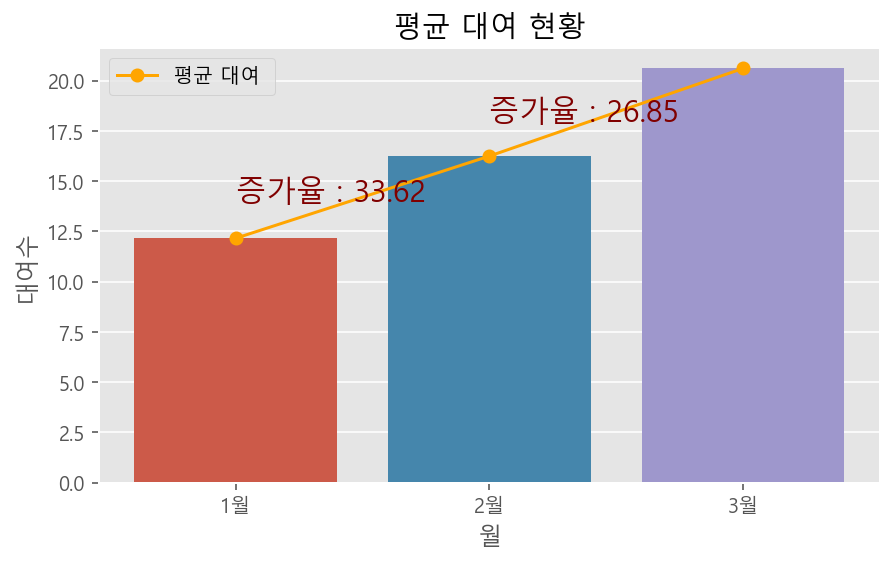

In [26]:
## 월별 dataframe
df_month1 = df[df['month']==1].sort_values('day')
df_month2 = df[df['month']==2].sort_values('day')
df_month3 = df[df['month']==3].sort_values('day')

# 월별 figure
plt.figure(figsize=(10,4))
m1 = df_month1.groupby('day').count()['goodsnm'].mean()
sns.countplot(data=df_month1, x ='day')
plt.plot(range(-1, 32), 33*[m1], label =f'일별 평균 대여 수 : {round(m1,2)}회')
plt.title('1월 일별 대여 현황')
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
m2 = df_month2.groupby('day').count()['goodsnm'].mean()
sns.countplot(data=df_month2, x ='day')
plt.plot(range(-1, 29), 30*[m2], label =f'일별 평균 대여 수 : {round(m2,2)}회')
plt.title('2월 일별 대여 현황')
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
m3 = df_month3.groupby('day').count()['goodsnm'].mean()
sns.countplot(data=df_month3, x ='day')
plt.plot(range(-1, 32), 33*[m3], label =f'일별 평균 대여 수 : {round(m3,2)}회')
plt.title('3월 일별 대여 현황')
plt.legend()
plt.show()

# 평균 dataframe
df_mean = pd.DataFrame(data = [[m1, m2, m3] ], columns=['1월', '2월', '3월'], index=['평균'])

# 월별 변화량 그래프
val1 = round((df_mean.loc['평균', '2월']/df_mean.loc['평균', '1월'] -1) * 100, 2)
val2 = round((df_mean.loc['평균', '3월']/df_mean.loc['평균', '2월'] -1) * 100, 2)
plt.figure(figsize=(7,4))
sns.barplot(data=df_mean.loc[['평균'], :])
plt.plot(df_mean.columns, df_mean.loc['평균'], 'o-',color='orange', label='평균 대여 ')
plt.text(0., 14, f'증가율 : {val1}', fontsize=15, color ='maroon')
plt.text(1, 18, f'증가율 : {val2}', fontsize=15, color ='maroon')

plt.xlabel('월')
plt.ylabel('대여수')
plt.title('평균 대여 현황')
plt.legend()
plt.show()
# print('2월 증가율 :', (df_mean.loc['평균', '2월']/df_mean.loc['평균', '1월'] -1) * 100)
# print('3월 증가율 :', (df_mean.loc['평균', '3월']/df_mean.loc['평균', '2월'] -1) * 100)

## 👉🏻 p_type별 월 대여 현황

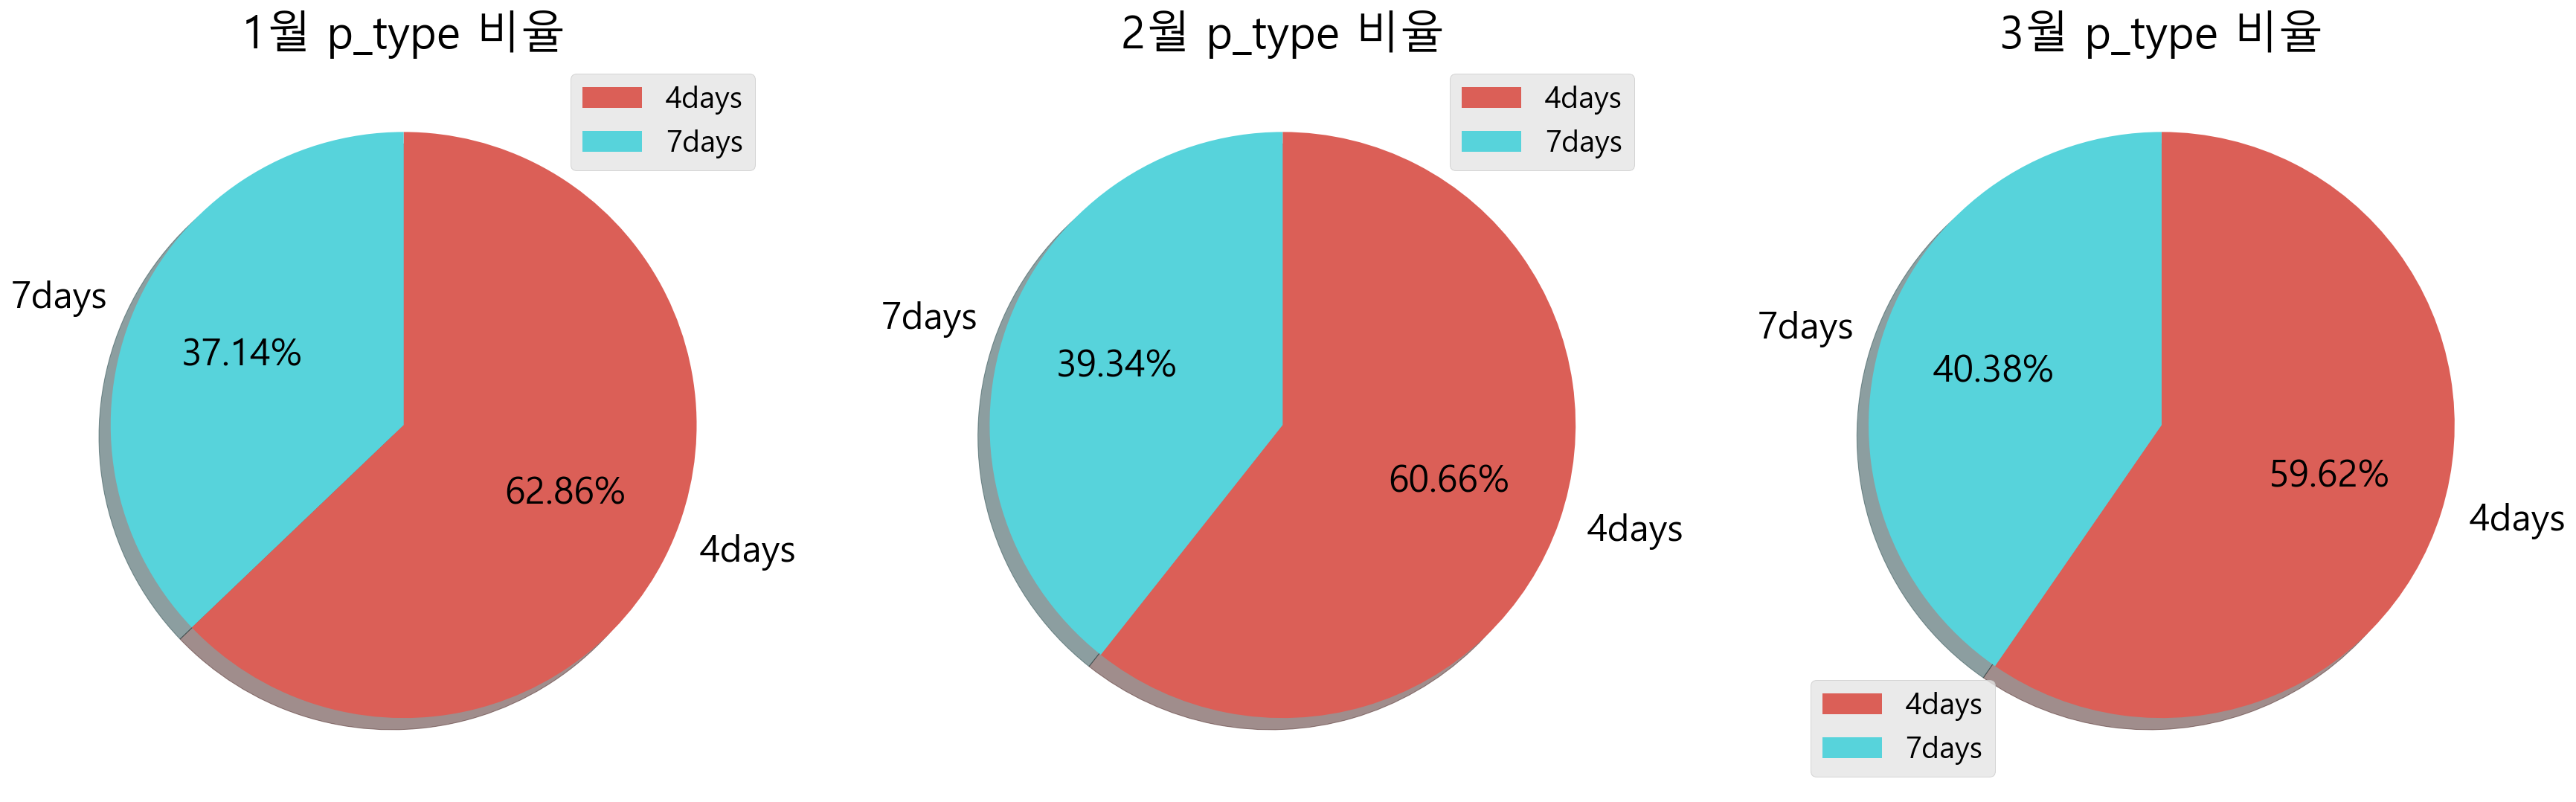

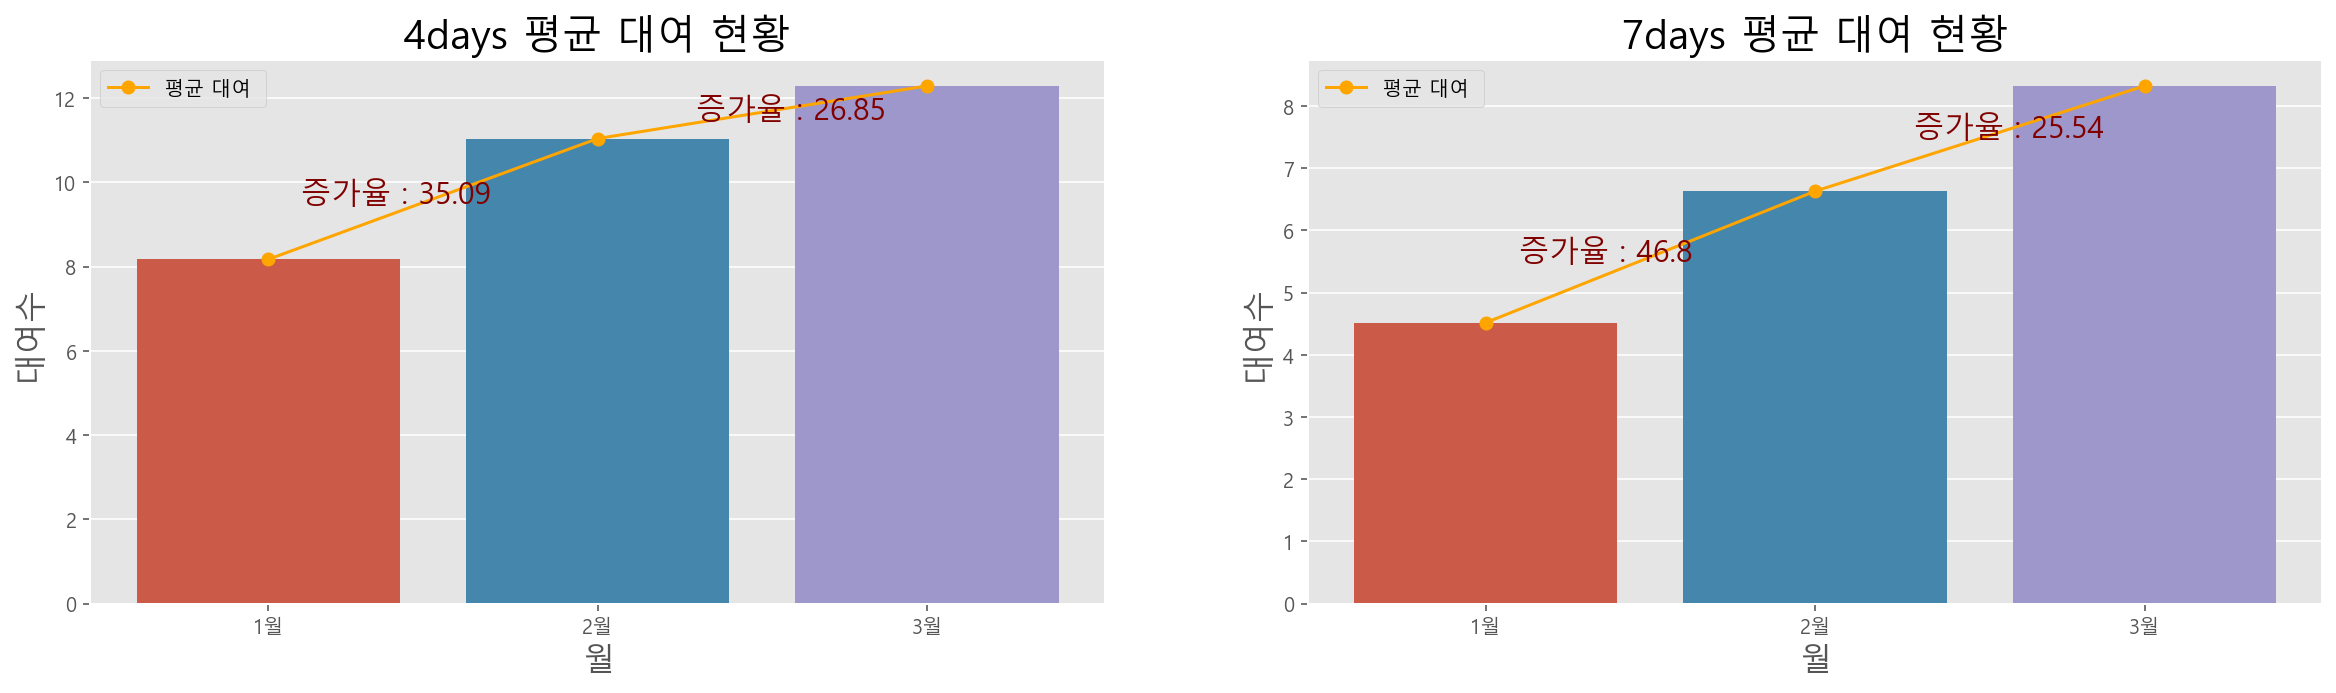

In [46]:
## month/p_type 별 dataframe
df_month1_4days = df_month1[df_month1['p_type']=='4days'].sort_values('day')
df_month1_7days = df_month1[df_month1['p_type']=='7days'].sort_values('day')

df_month2_4days = df_month2[df_month2['p_type']=='4days'].sort_values('day')
df_month2_7days = df_month2[df_month2['p_type']=='7days'].sort_values('day')

df_month3_4days = df_month3[df_month3['p_type']=='4days'].sort_values('day')
df_month3_7days = df_month3[df_month3['p_type']=='7days'].sort_values('day')



# 평균 dataframe
m14 = (df_month1[df_month1['p_type']=='4days'].groupby('day').count()['goodsnm'].mean())
m17 = (df_month1[df_month1['p_type']=='7days'].groupby('day').count()['goodsnm'].mean())

m24 = (df_month2[df_month2['p_type']=='4days'].groupby('day').count()['goodsnm'].mean())
m27 = (df_month2[df_month2['p_type']=='7days'].groupby('day').count()['goodsnm'].mean())

m34 = (df_month3[df_month3['p_type']=='4days'].groupby('day').count()['goodsnm'].mean())
m37 = (df_month3[df_month3['p_type']=='7days'].groupby('day').count()['goodsnm'].mean())

df_mean.loc['4days 평균', ['1월', '2월', '3월']] = [m14, m24, m34]
df_mean.loc['7days 평균', ['1월', '2월', '3월']] = [m17, m27, m37]


## 파이 차트
labels = ['4days', '7days']
colors = sns.color_palette('hls', len(labels))
fig = plt.figure(figsize=(30,10))
fig.set_facecolor('white')

fig.add_subplot(1,3,1)
frequency1 = [df_month1_4days.shape[0], df_month1_7days.shape[0]]
pie1 = plt.pie(frequency1, 
       startangle=90, 
       shadow=True, 
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p), 
       colors = colors,
       labels = labels,
       textprops={'fontsize': 25}
       )
plt.legend(fontsize=20)
plt.title('1월 p_type 비율', fontsize=30)

fig.add_subplot(1,3,2)
frequency2 = [df_month2_4days.shape[0], df_month2_7days.shape[0]]
pie2 = plt.pie(frequency2, 
       startangle=90,
       shadow=True, 
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p), 
       colors = colors,
       labels = labels,
       textprops={'fontsize': 25}
       )
plt.legend(fontsize=20)
plt.title('2월 p_type 비율', fontsize=30)

fig.add_subplot(1,3,3)
frequency3 = [df_month3_4days.shape[0], df_month3_7days.shape[0]]
pie3 = plt.pie(frequency3, 
       startangle=90, 
       shadow=True, 
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p),
       colors = colors,
       labels = labels,
       textprops={'fontsize': 25}
       )
plt.legend(fontsize=20)
plt.title('3월 p_type 비율', fontsize=30)
plt.show()


## 막대 그래프
fig = plt.figure(figsize=(20,5))
gs = GridSpec(1,2)
sns.barplot(data=df_mean.loc[['4days 평균'], :], ax = fig.add_subplot(gs[0,0]))
plt.plot(df_mean.columns, df_mean.loc['4days 평균'], 'o-', color='orange', label='평균 대여 ')
plt.xlabel('월', fontsize=16)
plt.ylabel('대여수', fontsize=16)
plt.title('4days 평균 대여 현황', fontsize=20)

val11 = round((df_mean.loc['4days 평균', '2월']/df_mean.loc['4days 평균', '1월'] -1) * 100, 2)
val12 = round((df_mean.loc['평균', '3월']/df_mean.loc['평균', '2월'] -1) * 100, 2)

plt.text(0.1, 9.5, f'증가율 : {val11}', fontsize=15, color ='maroon')
plt.text(1.3, 11.5, f'증가율 : {val12}', fontsize=15, color ='maroon')

plt.legend()

sns.barplot(data=df_mean.loc[['7days 평균'], :], ax = fig.add_subplot(gs[0,1]))
plt.plot(df_mean.columns, df_mean.loc['7days 평균'], 'o-', color='orange', label='평균 대여 ')
plt.xlabel('월', fontsize=16)
plt.ylabel('대여수', fontsize=16)

val21 = round((df_mean.loc['7days 평균', '2월']/df_mean.loc['7days 평균', '1월'] -1) * 100, 2)
val22 = round((df_mean.loc['7days 평균', '3월']/df_mean.loc['7days 평균', '2월'] -1) * 100, 2)

plt.text(0.1, 5.5, f'증가율 : {val21}', fontsize=15, color ='maroon')
plt.text(1.3, 7.5, f'증가율 : {val22}', fontsize=15, color ='maroon')
plt.title('7days 평균 대여 현황', fontsize=20)
plt.legend()

plt.show()

## 👉🏻 APP/WEB 월 대여 현황

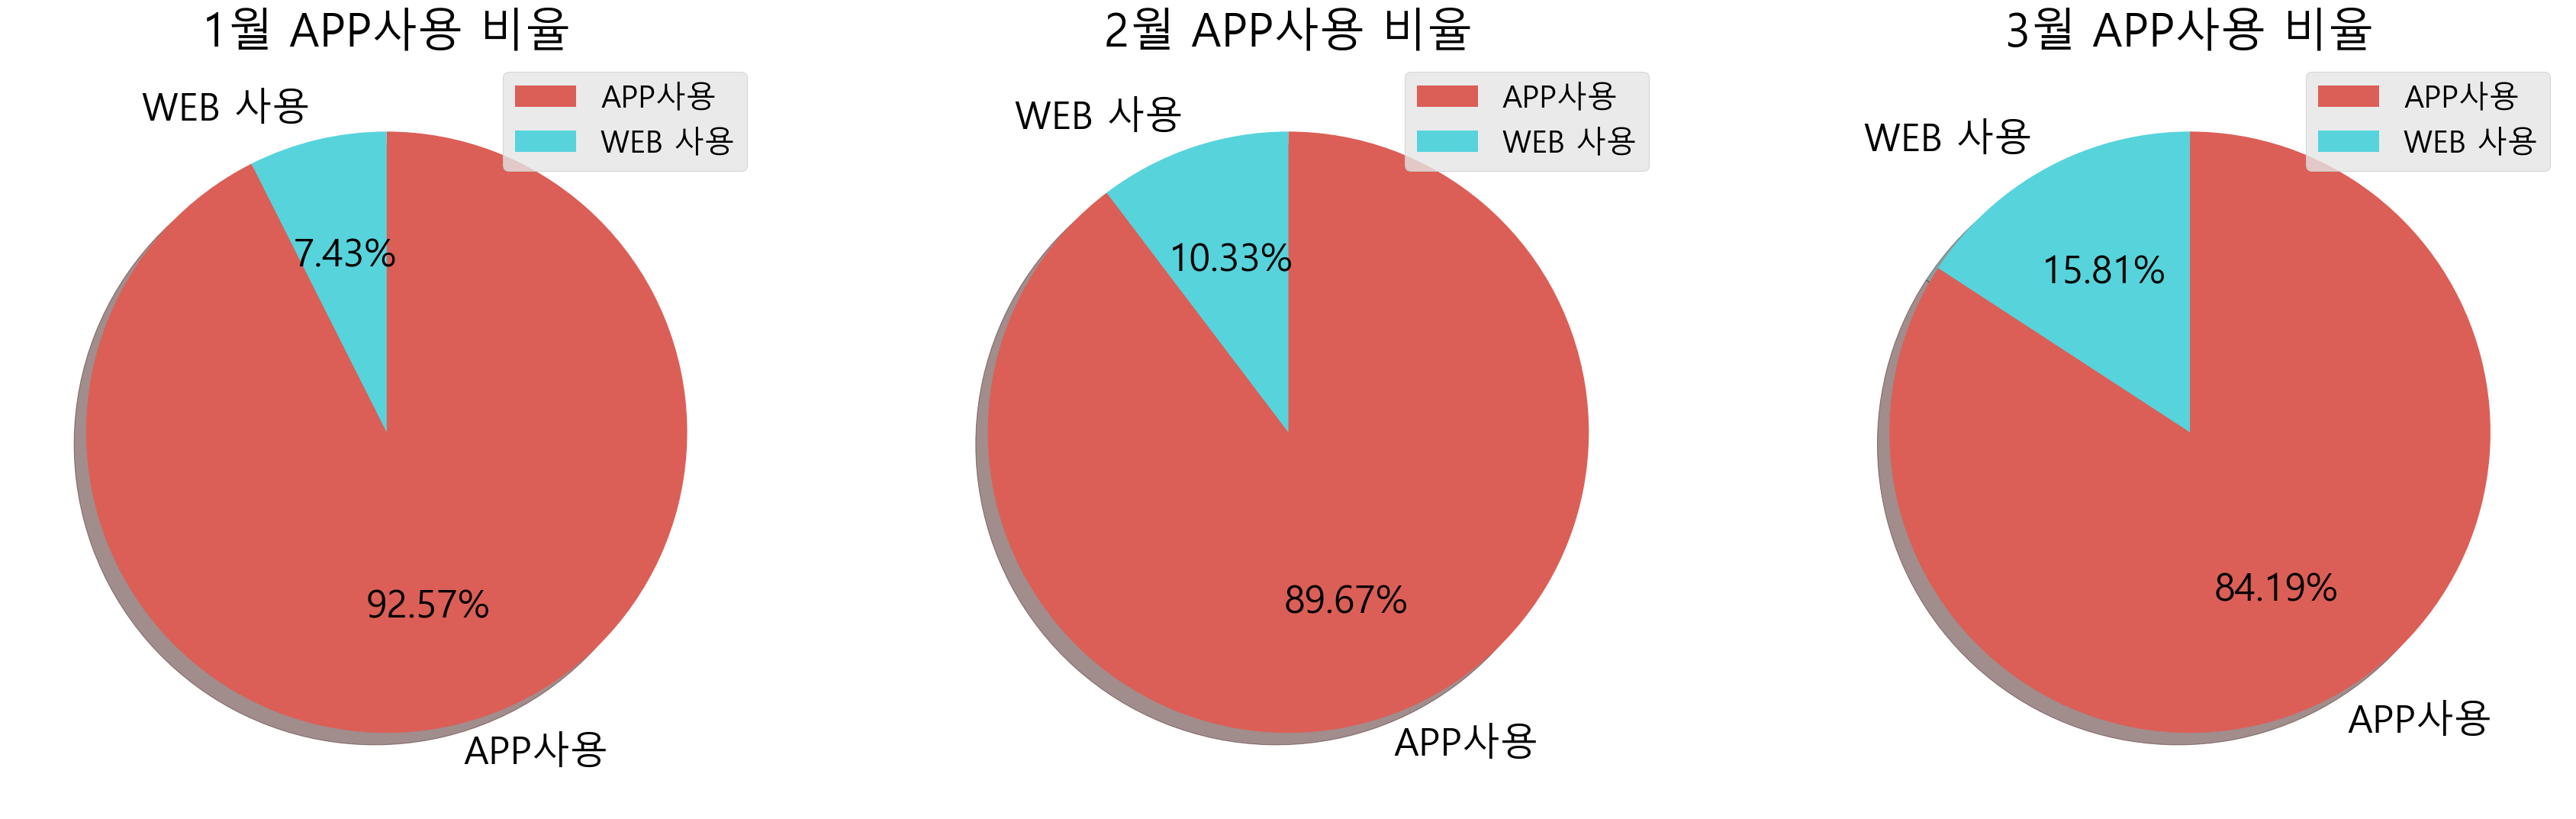

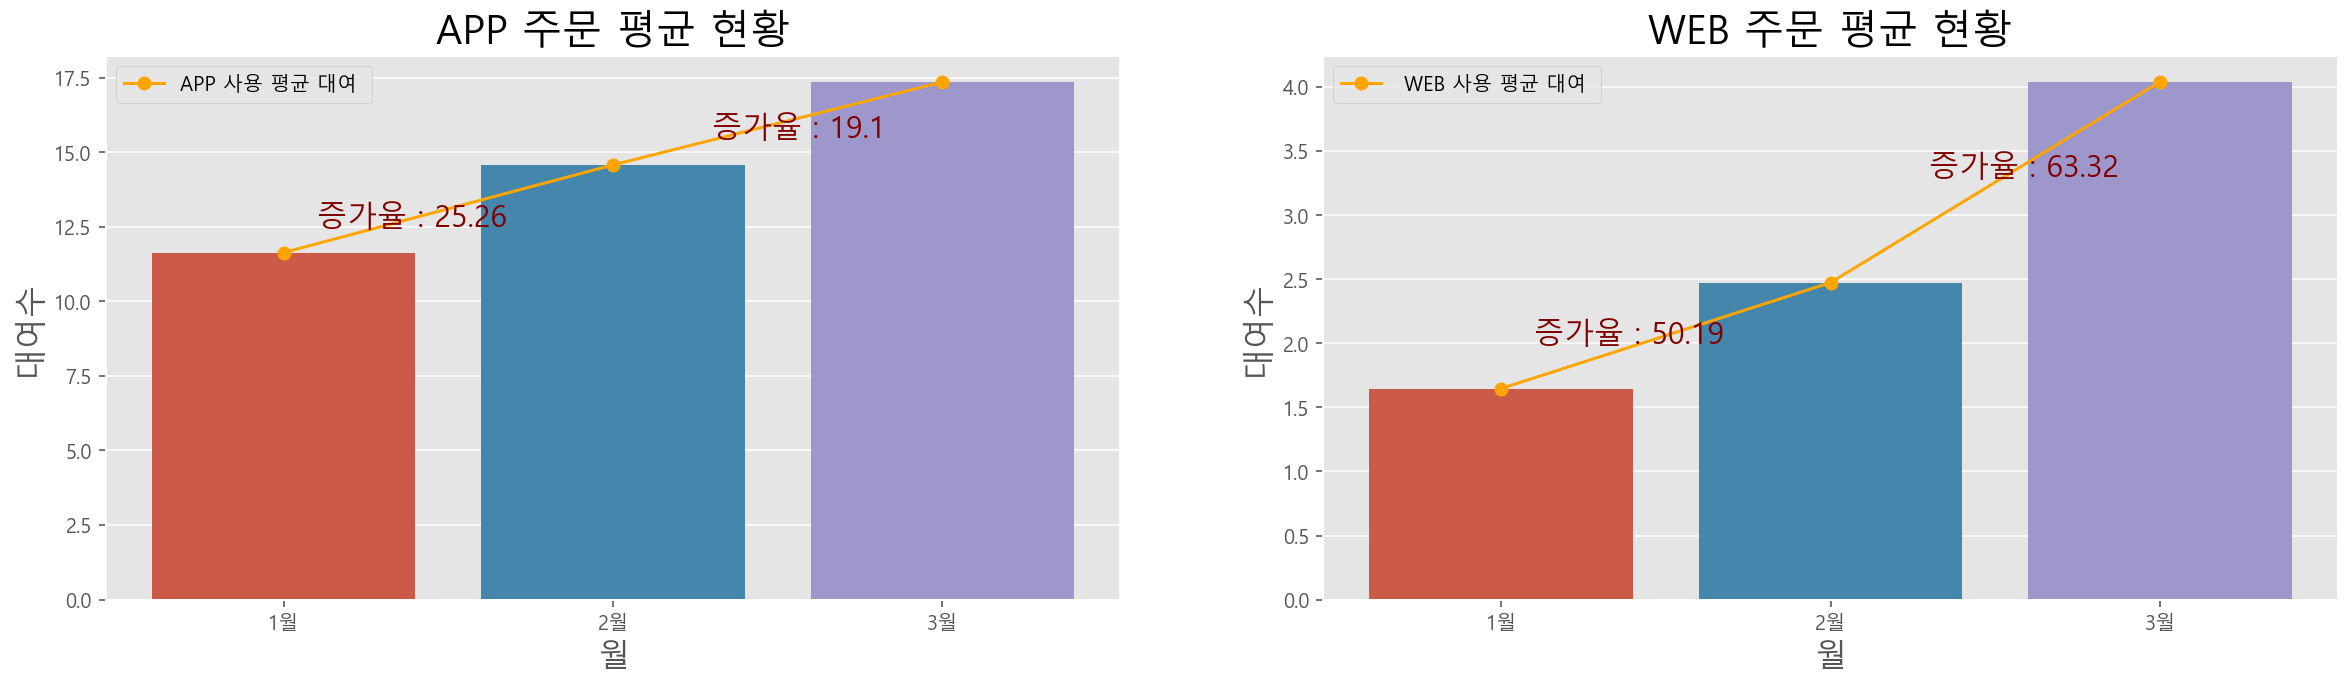

In [63]:
## app dataframe
df_month1_app = df_month1[df_month1['app_yn']=='Y'].sort_values('day')
df_month1_web = df_month1[df_month1['app_yn']=='N'].sort_values('day')

df_month2_app = df_month2[df_month2['app_yn']=='Y'].sort_values('day')
df_month2_web = df_month2[df_month2['app_yn']=='N'].sort_values('day')

df_month3_app = df_month3[df_month3['app_yn']=='Y'].sort_values('day')
df_month3_web = df_month3[df_month3['app_yn']=='N'].sort_values('day')


## 평균 dataframe
m1y = (df_month1[df_month1['app_yn']=='Y'].groupby('day').count()['goodsnm'].mean())
m1n = (df_month1[df_month1['app_yn']=='N'].groupby('day').count()['goodsnm'].mean())

m2y = (df_month2[df_month2['app_yn']=='Y'].groupby('day').count()['goodsnm'].mean())
m2n = (df_month2[df_month2['app_yn']=='N'].groupby('day').count()['goodsnm'].mean())

m3y = (df_month3[df_month3['app_yn']=='Y'].groupby('day').count()['goodsnm'].mean())
m3n = (df_month3[df_month3['app_yn']=='N'].groupby('day').count()['goodsnm'].mean())

df_mean.loc['APP 사용 평균', ['1월', '2월', '3월']] = [m1y, m2y, m3y]
df_mean.loc['WEB 사용 평균', ['1월', '2월', '3월']] = [m1n, m2n, m3n]


## 파이 차트
labels = ['APP사용', 'WEB 사용']
colors = sns.color_palette('hls', len(labels))
fig = plt.figure(figsize=(30,10))
fig.set_facecolor('white')

fig.add_subplot(1,3,1)
frequency1 = [df_month1_app.shape[0], df_month1_web.shape[0]]
pie1 = plt.pie(frequency1, 
       startangle=90, 
       shadow=True, 
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p), 
       colors = colors,
       labels = labels,
       textprops={'fontsize': 25}
       )
plt.legend(fontsize=20)
plt.title('1월 APP사용 비율', fontsize=30)

fig.add_subplot(1,3,2)
frequency2 = [df_month2_app.shape[0], df_month2_web.shape[0]]
pie2 = plt.pie(frequency2, 
       startangle=90,         
       shadow=True, 
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p), 
       colors = colors,
       labels = labels,
       textprops={'fontsize': 25}
       )
plt.legend(fontsize=20)
plt.title('2월 APP사용 비율', fontsize=30)

fig.add_subplot(1,3,3)
frequency3 = [df_month3_app.shape[0], df_month3_web.shape[0]]
pie3 = plt.pie(frequency3, 
       startangle=90,
       shadow=True, 
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p),
       colors = colors,
       labels = labels,
       textprops={'fontsize': 25}
       )
plt.legend(fontsize=20)
plt.title('3월 APP사용 비율', fontsize=30)
plt.show()


## 막대 그래프
fig = plt.figure(figsize=(20,5))
gs = GridSpec(1,2)
sns.barplot(data=df_mean.loc[['APP 사용 평균'], :], ax = fig.add_subplot(gs[0,0]))
plt.plot(df_mean.columns, df_mean.loc['APP 사용 평균'], 'o-', color='orange', label='APP 사용 평균 대여 ')
plt.xlabel('월', fontsize=16)
plt.ylabel('대여수', fontsize=16)
plt.title('APP 주문 평균 현황', fontsize=20)

val11 = round((df_mean.loc['APP 사용 평균', '2월']/df_mean.loc['APP 사용 평균', '1월'] -1) * 100, 2)
val12 = round((df_mean.loc['APP 사용 평균', '3월']/df_mean.loc['APP 사용 평균', '2월'] -1) * 100, 2)
plt.text(0.1, 12.5, f'증가율 : {val11}', fontsize=15, color ='maroon')
plt.text(1.3, 15.5, f'증가율 : {val12}', fontsize=15, color ='maroon')
plt.legend()

sns.barplot(data=df_mean.loc[['WEB 사용 평균'], :], ax = fig.add_subplot(gs[0,1]))
plt.plot(df_mean.columns, df_mean.loc['WEB 사용 평균'], 'o-', color='orange', label=' WEB 사용 평균 대여 ')
plt.xlabel('월', fontsize=16)
plt.ylabel('대여수', fontsize=16)
plt.title('WEB 주문 평균 현황', fontsize=20)

val21 = round((df_mean.loc['WEB 사용 평균', '2월']/df_mean.loc['WEB 사용 평균', '1월'] -1) * 100, 2)
val22 = round((df_mean.loc['WEB 사용 평균', '3월']/df_mean.loc['WEB 사용 평균', '2월'] -1) * 100, 2)
plt.text(0.1, 2, f'증가율 : {val21}', fontsize=15, color ='maroon')
plt.text(1.3, 3.3, f'증가율 : {val22}', fontsize=15, color ='maroon')
plt.legend()

plt.show()
# print('APP 사용 2월 증가율 :', (df_mean.loc['APP 사용 평균', '2월']/df_mean.loc['APP 사용 평균', '1월'] -1) * 100)
# print('APP 사용 3월 증가율 :', (df_mean.loc['APP 사용 평균', '3월']/df_mean.loc['APP 사용 평균', '2월'] -1) * 100)
# print('')
# print('WEB 사용 2월 증가율 :', (df_mean.loc['WEB 사용 평균', '2월']/df_mean.loc['WEB 사용 평균', '1월'] -1) * 100)
# print('WEB 사용 3월 증가율 :', (df_mean.loc['WEB 사용 평균', '3월']/df_mean.loc['WEB 사용 평균', '2월'] -1) * 100)

## 👉🏻 제품 타입별 대여 현황

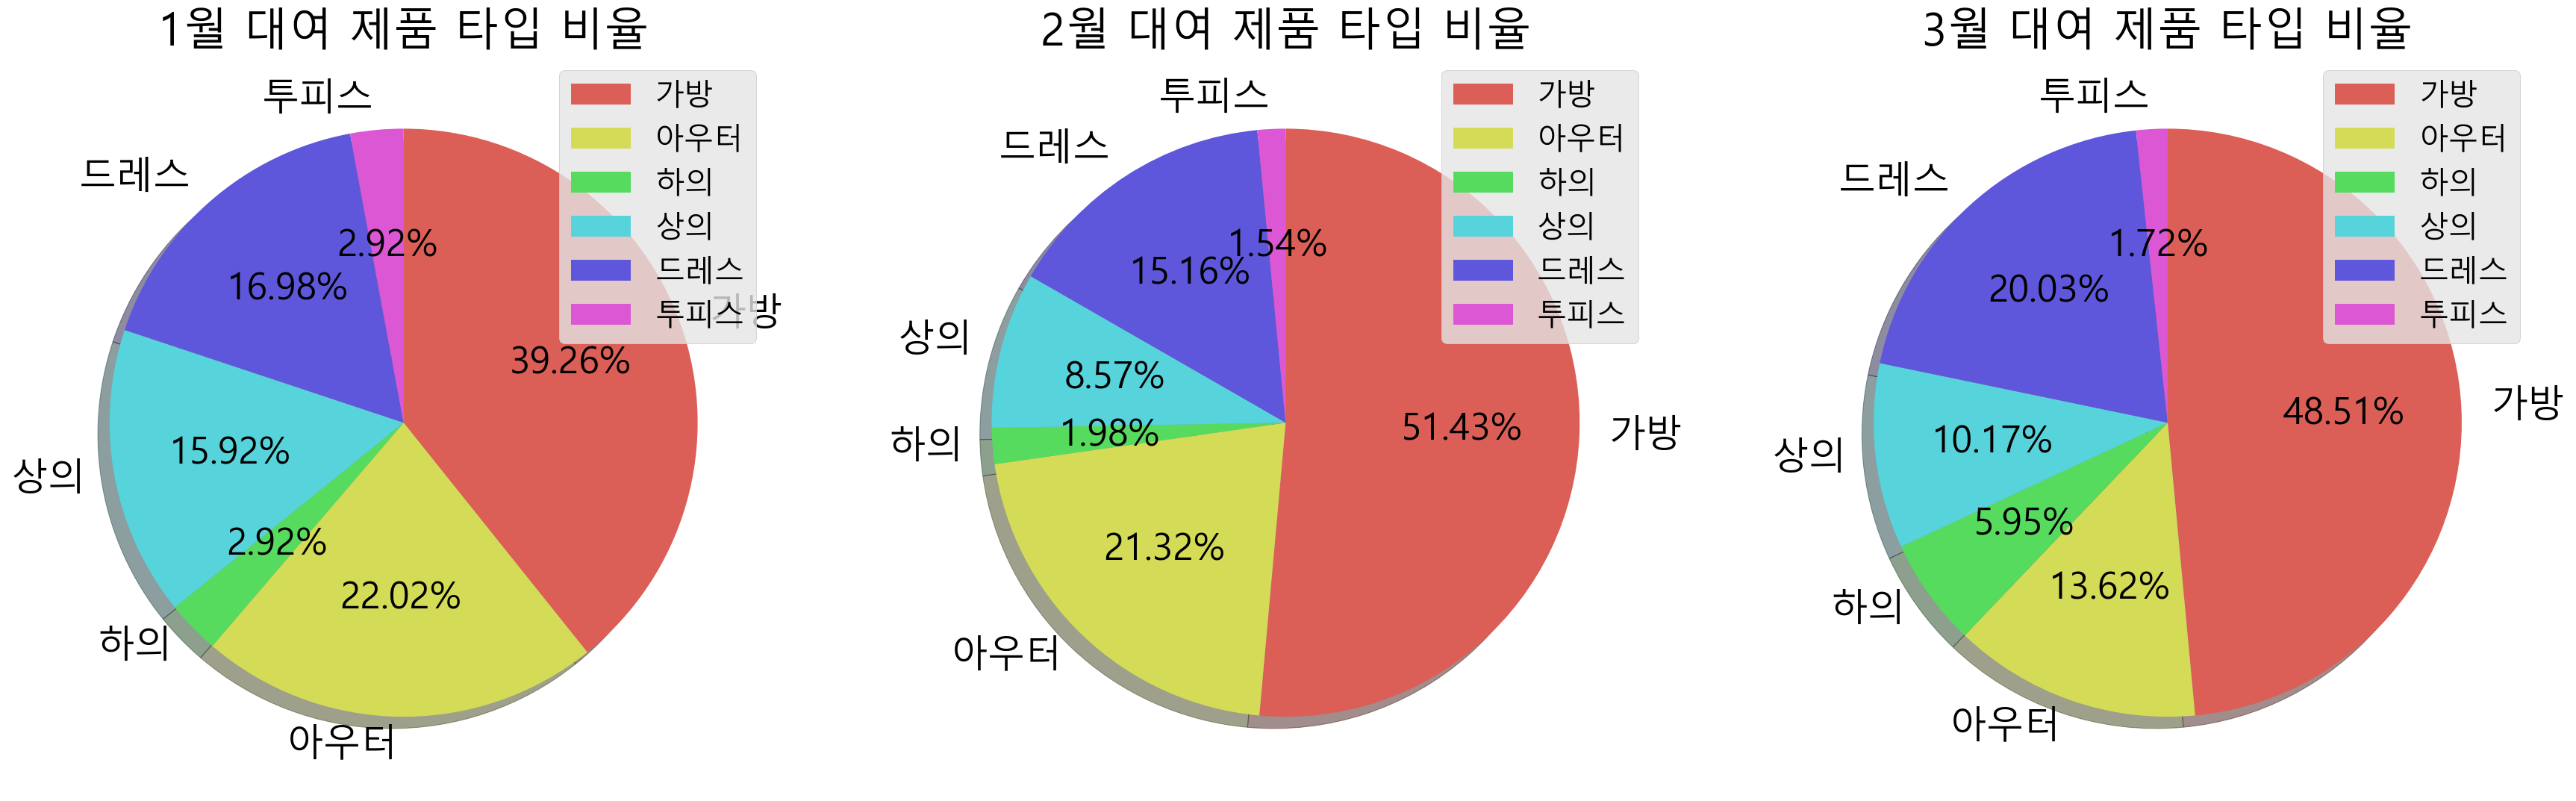

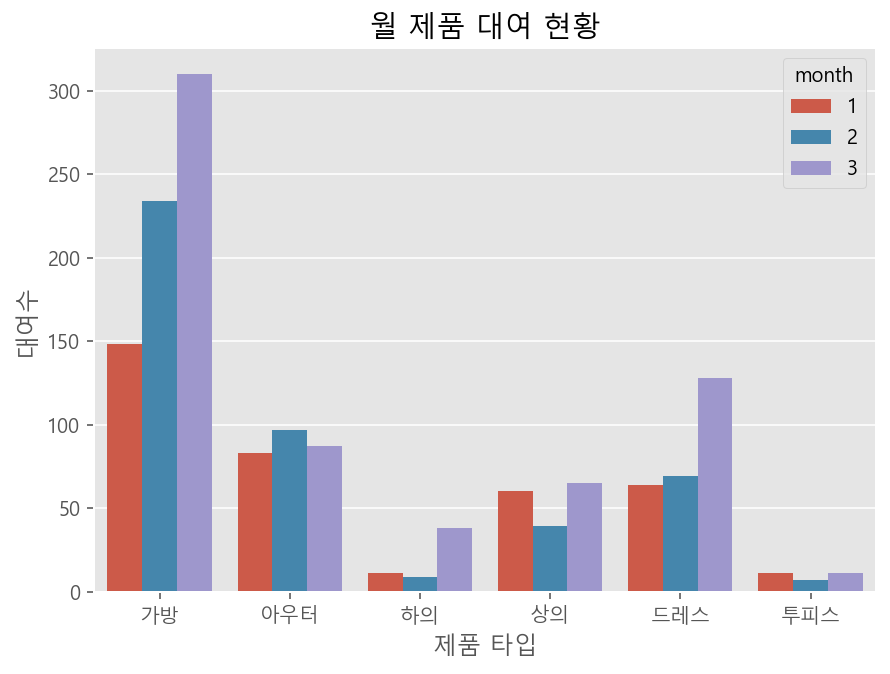

In [76]:
## 제품 dataframe
df_month1_ba = df_month1[df_month1['타입']=='가방'].sort_values('day')
df_month1_o = df_month1[df_month1['타입']=='아우터'].sort_values('day')
df_month1_b = df_month1[df_month1['타입']=='하의'].sort_values('day')
df_month1_t = df_month1[df_month1['타입']=='상의'].sort_values('day')
df_month1_d = df_month1[df_month1['타입']=='드레스'].sort_values('day')
df_month1_tp = df_month1[df_month1['타입']=='투피스'].sort_values('day')

df_month2_ba = df_month2[df_month2['타입']=='가방'].sort_values('day')
df_month2_o = df_month2[df_month2['타입']=='아우터'].sort_values('day')
df_month2_b = df_month2[df_month2['타입']=='하의'].sort_values('day')
df_month2_t = df_month2[df_month2['타입']=='상의'].sort_values('day')
df_month2_d = df_month2[df_month2['타입']=='드레스'].sort_values('day')
df_month2_tp = df_month2[df_month2['타입']=='투피스'].sort_values('day')

df_month3_ba = df_month3[df_month3['타입']=='가방'].sort_values('day')
df_month3_o = df_month3[df_month3['타입']=='아우터'].sort_values('day')
df_month3_b = df_month3[df_month3['타입']=='하의'].sort_values('day')
df_month3_t = df_month3[df_month3['타입']=='상의'].sort_values('day')
df_month3_d = df_month3[df_month3['타입']=='드레스'].sort_values('day')
df_month3_tp = df_month3[df_month3['타입']=='투피스'].sort_values('day')


## 파이차트
labels = ['가방', '아우터', '하의', '상의', '드레스', '투피스']
colors = sns.color_palette('hls', len(labels))
fig = plt.figure(figsize=(30,10))
fig.set_facecolor('white')

fig.add_subplot(1,3,1)
frequency1 = [df_month1_ba.shape[0], df_month1_o.shape[0], df_month1_b.shape[0], df_month1_t.shape[0], df_month1_d.shape[0], df_month1_tp.shape[0]]
pie1 = plt.pie(frequency1, 
       startangle=90, 
       shadow=True, 
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p), 
       colors = colors,
       labels = labels,
       textprops={'fontsize': 25}
       )
plt.legend(fontsize=20)
plt.title('1월 대여 제품 타입 비율', fontsize=30)

fig.add_subplot(1,3,2)
frequency2 = [df_month2_ba.shape[0], df_month2_o.shape[0], df_month2_b.shape[0], df_month2_t.shape[0], df_month2_d.shape[0], df_month2_tp.shape[0]]
pie2 = plt.pie(frequency2, 
       startangle=90,         
       shadow=True, 
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p), 
       colors = colors,
       labels = labels,
       textprops={'fontsize': 25}
       )
plt.legend(fontsize=20)
plt.title('2월 대여 제품 타입 비율', fontsize=30)

fig.add_subplot(1,3,3)
frequency3 = [df_month3_ba.shape[0], df_month3_o.shape[0], df_month3_b.shape[0], df_month3_t.shape[0], df_month3_d.shape[0], df_month3_tp.shape[0]]
pie3 = plt.pie(frequency3, 
       startangle=90,
       shadow=True, 
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p),
       colors = colors,
       labels = labels,
       textprops={'fontsize': 25}
       )
plt.legend(fontsize=20)
plt.title('3월 대여 제품 타입 비율', fontsize=30)
plt.show()


## 막대 그래프
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='타입', hue='month')
plt.title('월 제품 대여 현황')
plt.xlabel('제품 타입')
plt.ylabel('대여수')
plt.show()